# Packages

In [2]:
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
#import tensorflow_text as txt

# Data

In [9]:
# Read the data from a CSV file
df = pd.read_csv('https://raw.githubusercontent.com/AnnaGarcia1207/722_project/main/dataset/train_test_datasetV2.csv')
df

,ID,tweet,clean_tweet,target
0,2441,"well,these sewer rats don't take a cent from m...",wellthese sewer rats dont cent mei dont use wa...,1
1,839,how cool is this! i have a own page :d #masks ...,cool page,0
2,15,#justinb gorilla simulator: you need to do t...,gorilla simulator need adapt environment need ...,0
3,3007,@HuffingtonPost if the faggots can have a page...,faggots page cant theyfaggots offend,1
4,3079,@wclemons @thejoelberggren @anthonycumia you l...,little fag fuck woman kids plus work suppo hi...,1
...,...,...,...,...
6003,3773,RT @LilTy___: Who do bitches take me for? &#12...,bitches,1
6004,5192,First jig of the night,jig night,0
6005,5227,Get two birds stoned at one time.,birds stoned time,0
6006,5391,I think I'll have salad bar for lunch today. G...,think ill salad bar lunch today gotta bi hday ...,0


In [10]:
# Preprocess the text data
df_clean = df[['clean_tweet', 'target']]
df_clean.head(5)

,clean_tweet,target
0,wellthese sewer rats dont cent mei dont use wa...,1
1,cool page,0
2,gorilla simulator need adapt environment need ...,0
3,faggots page cant theyfaggots offend,1
4,little fag fuck woman kids plus work suppo hi...,1


In [11]:
df_clean.groupby('target').describe()

clean_tweet                              
             count unique               top freq
target                                          
0             3715   3635  love u u time ur   14
1             2293   2084           libtard   41

In [12]:
# Convert the 'clean_tweet' column to string data type
df_clean['clean_tweet'] = df_clean['clean_tweet'].astype(str)
df_clean['target'] = df_clean['target'].astype('float32')


/tmp/ipykernel_2891021/2172810109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['clean_tweet'] = df_clean['clean_tweet'].astype(str)
/tmp/ipykernel_2891021/2172810109.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['target'] = df_clean['target'].astype('float32')


In [13]:
df_clean.dtypes

clean_tweet     object
target         float32
dtype: object

# Train/Test

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_clean['clean_tweet'], df_clean['target'], test_size=0.3, random_state=42)

In [15]:
y_train.head(4)

5678    1.0
45      1.0
1260    0.0
1096    0.0
Name: target, dtype: float32

# Using Bert

In [18]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")

In [17]:
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

## Build the model

In [19]:
# Bert Layers

text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural Network Layers

l = tf.keras.layers.Dropout(0.1, name='dropout')(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(l)

# Construct final model
model = tf.keras.Model(inputs=[text_input], outputs=[l])

In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer_3 (KerasLayer)  {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                              

## Train the model

In [21]:
METRICS = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.F1Score(name='f1')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [22]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
132/132 [==============================] - 301s 2s/step - loss: 0.6653 - accuracy: 0.6083 - precision: 0.4455 - recall: 0.1174 - f1: 0.5515
Epoch 2/10
132/132 [==============================] - 294s 2s/step - loss: 0.6354 - accuracy: 0.6373 - precision: 0.5648 - recall: 0.2067 - f1: 0.5515
Epoch 3/10
132/132 [==============================] - 294s 2s/step - loss: 0.6114 - accuracy: 0.6595 - precision: 0.6085 - recall: 0.2961 - f1: 0.5515
Epoch 4/10
132/132 [==============================] - 294s 2s/step - loss: 0.5941 - accuracy: 0.6792 - precision: 0.6486 - recall: 0.3435 - f1: 0.5515
Epoch 5/10
132/132 [==============================] - 295s 2s/step - loss: 0.5788 - accuracy: 0.6942 - precision: 0.6768 - recall: 0.3766 - f1: 0.5515
Epoch 6/10
132/132 [==============================] - 297s 2s/step - loss: 0.5708 - accuracy: 0.6977 - precision: 0.6712 - recall: 0.4041 - f1: 0.5515
Epoch 7/10
132/132 [==============================] - 296s 2s/step - loss: 0.5624 - accuracy: 

## Save the model

In [23]:
model.save("AL_algorithm/bert_model")

INFO:tensorflow:Assets written to: bert/bert_model/assets


INFO:tensorflow:Assets written to: bert/bert_model/assets


# Test the model

## Call experiment dataset

In [3]:
experiment_df = pd.read_csv('https://raw.githubusercontent.com/AnnaGarcia1207/722_project/main/dataset/experiment_datasetV2.csv')
experiment_df

,ID,tweet,clean_tweet,target
0,5119,Come on man RT @BasedLaRock: Oreo needs to chi...,come man oreo needs chill know good nah tco...,0
1,3575,I think you fuckin wit the wrong niggah,think fuckin wit wrong niggah,1
2,246,#russian gorilla simulator: you need to do t...,gorilla simulator need adapt environment need ...,0
3,3259,&#8220;@M_Rad: I'm going to miss these bitches...,im going miss bitches tcolupoqat2r9 far right...,1
4,5805,RT @ChrisPalmerNBA: Udonis talking some big tr...,udonis talking big trash lance lebron holds,0
...,...,...,...,...
995,1551,@user pay of #rich #white #snobs via @user #...,pay,1
996,4505,@Hovaa_ your pet zebra. stripey?,pet zebra stripey,0
997,790,orlando alligator: body of boy seized by allig...,orlando alligator body boy seized alligator found,0
998,6826,Why is all these artist and new ones making so...,a ist new ones making trash,0


In [4]:
# Convert the 'clean_tweet' column to string data type
experiment_df['clean_tweet'] = experiment_df['clean_tweet'].astype(str)
experiment_df['target'] = experiment_df['target'].astype('float32')

## Make prediction

In [69]:
model.evaluate(experiment_df['clean_tweet'], experiment_df['target'])

32/32 [==============================] - 69s 2s/step - loss: 0.5075 - accuracy: 0.7640 - precision: 0.7819 - recall: 0.5094 - f1: 0.5433


[0.5075077414512634,
 0.7639999985694885,
 0.7818930149078369,
 0.5093833804130554,
 array([0.54333574], dtype=float32)]

In [70]:
experiment_df['prob'] = model.predict(experiment_df['clean_tweet'])
experiment_df

32/32 [==============================] - 69s 2s/step


,ID,tweet,clean_tweet,target,prob
0,5119,Come on man RT @BasedLaRock: Oreo needs to chi...,come man oreo needs chill know good nah tco...,0.0,0.322175
1,3575,I think you fuckin wit the wrong niggah,think fuckin wit wrong niggah,1.0,0.736497
2,246,#russian gorilla simulator: you need to do t...,gorilla simulator need adapt environment need ...,0.0,0.146530
3,3259,&#8220;@M_Rad: I'm going to miss these bitches...,im going miss bitches tcolupoqat2r9 far right...,1.0,0.418184
4,5805,RT @ChrisPalmerNBA: Udonis talking some big tr...,udonis talking big trash lance lebron holds,0.0,0.379720
...,...,...,...,...,...
995,1551,@user pay of #rich #white #snobs via @user #...,pay,1.0,0.549023
996,4505,@Hovaa_ your pet zebra. stripey?,pet zebra stripey,0.0,0.133636
997,790,orlando alligator: body of boy seized by allig...,orlando alligator body boy seized alligator found,0.0,0.177329
998,6826,Why is all these artist and new ones making so...,a ist new ones making trash,0.0,0.516672


In [ ]:
# save experiment_df to csv
experiment_df.to_csv('../dataset/experiment_df_bert.csv', index=False)

## Optimize threshold

In [3]:
experiment_df = pd.read_csv('../dataset/experiment_df_bert.csv')
experiment_df

,ID,tweet,clean_tweet,target,prob,y_hat
0,5119,Come on man RT @BasedLaRock: Oreo needs to chi...,come man oreo needs chill know good nah tco...,0.0,0.322175,0
1,3575,I think you fuckin wit the wrong niggah,think fuckin wit wrong niggah,1.0,0.736497,1
2,246,#russian gorilla simulator: you need to do t...,gorilla simulator need adapt environment need ...,0.0,0.146530,0
3,3259,&#8220;@M_Rad: I'm going to miss these bitches...,im going miss bitches tcolupoqat2r9 far right...,1.0,0.418184,0
4,5805,RT @ChrisPalmerNBA: Udonis talking some big tr...,udonis talking big trash lance lebron holds,0.0,0.379720,0
...,...,...,...,...,...,...
995,1551,@user pay of #rich #white #snobs via @user #...,pay,1.0,0.549023,1
996,4505,@Hovaa_ your pet zebra. stripey?,pet zebra stripey,0.0,0.133636,0
997,790,orlando alligator: body of boy seized by allig...,orlando alligator body boy seized alligator found,0.0,0.177329,0
998,6826,Why is all these artist and new ones making so...,a ist new ones making trash,0.0,0.516672,1


/Users/brianllinas/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/brianllinas/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/brianllinas/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/brianllinas/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

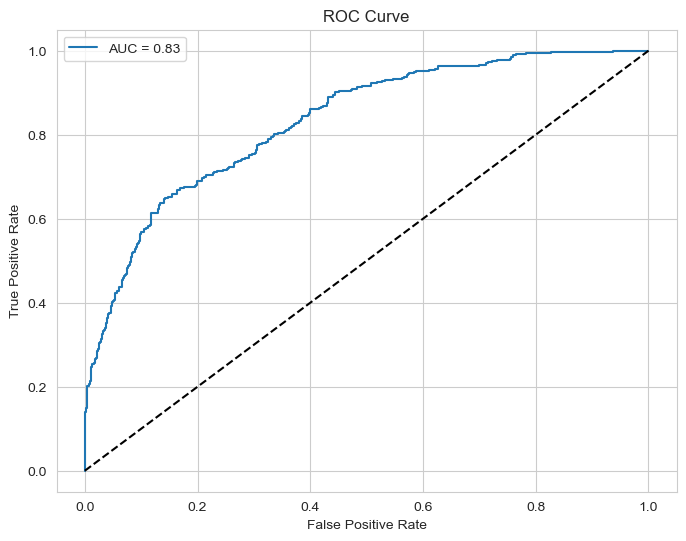

In [11]:
from sklearn import metrics
from sklearn import tree
from sklearn import ensemble
import matplotlib.pyplot as plt
import seaborn as sns

fpr, tpr, thresholds = metrics.roc_curve(experiment_df['target'],experiment_df['prob'])

# Plotting the ROC curve
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(8, 6))

    plt.plot(fpr, tpr, label=f'AUC = {metrics.auc(fpr, tpr):.2f}')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

    # Display the plot
    plt.show()

In [5]:
auc_rl=metrics.auc(fpr,tpr)
auc_rl

0.8317106439019801

In [6]:
df_tree=pd.DataFrame({'tpr':tpr,'fpr':fpr,'thresholds':thresholds,'Youden':tpr+(1-fpr)-1})
df_tree.sort_values('Youden',ascending=False).head(1)

,tpr,fpr,thresholds,Youden
129,0.648794,0.141946,0.451687,0.506848


/Users/brianllinas/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/brianllinas/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/brianllinas/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/brianllinas/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

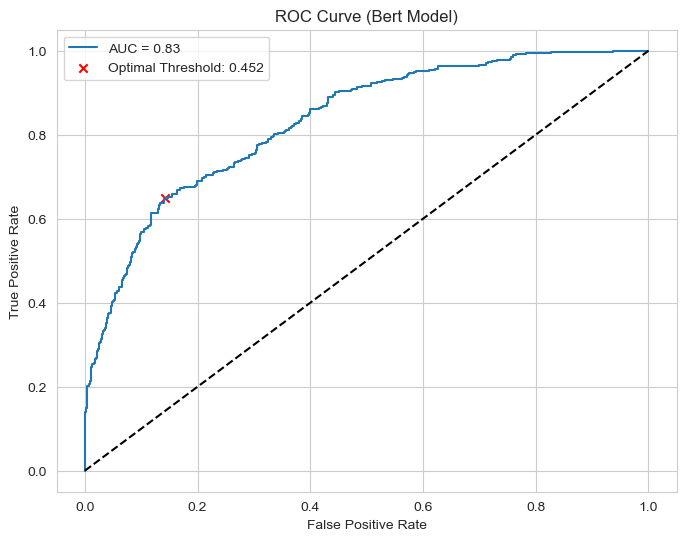

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Assuming experiment_df is your DataFrame
# Replace 'path/to/save/experiment_df.csv' with the actual path and filename

# Calculate ROC curve
fpr, tpr, thresholds = metrics.roc_curve(experiment_df['target'], experiment_df['prob'])

# Calculate Youden's J statistic
youden = tpr + (1 - fpr) - 1

# Find the optimal threshold
optimal_threshold_row = df_tree.sort_values('Youden', ascending=False).head(1)
optimal_threshold = optimal_threshold_row['thresholds'].values[0]

# Plotting the ROC curve
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(8, 6))

    plt.plot(fpr, tpr, label=f'AUC = {metrics.auc(fpr, tpr):.2f}')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference

    # Mark the optimal threshold on the plot
    plt.scatter(optimal_threshold_row['fpr'], optimal_threshold_row['tpr'], c='red', marker='x', label=f'Optimal Threshold: {optimal_threshold:.3f}')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Bert Model)')
    plt.legend()

    # Display the plot
    plt.show()


In [7]:
import numpy as np

experiment_df['y_hat'] = np.where(experiment_df['prob'] > 0.451687, 1, 0)
experiment_df

,ID,tweet,clean_tweet,target,prob,y_hat
0,5119,Come on man RT @BasedLaRock: Oreo needs to chi...,come man oreo needs chill know good nah tco...,0.0,0.322175,0
1,3575,I think you fuckin wit the wrong niggah,think fuckin wit wrong niggah,1.0,0.736497,1
2,246,#russian gorilla simulator: you need to do t...,gorilla simulator need adapt environment need ...,0.0,0.146530,0
3,3259,&#8220;@M_Rad: I'm going to miss these bitches...,im going miss bitches tcolupoqat2r9 far right...,1.0,0.418184,0
4,5805,RT @ChrisPalmerNBA: Udonis talking some big tr...,udonis talking big trash lance lebron holds,0.0,0.379720,0
...,...,...,...,...,...,...
995,1551,@user pay of #rich #white #snobs via @user #...,pay,1.0,0.549023,1
996,4505,@Hovaa_ your pet zebra. stripey?,pet zebra stripey,0.0,0.133636,0
997,790,orlando alligator: body of boy seized by allig...,orlando alligator body boy seized alligator found,0.0,0.177329,0
998,6826,Why is all these artist and new ones making so...,a ist new ones making trash,0.0,0.516672,1


## Check performance

In [8]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(experiment_df['target'], experiment_df['y_hat'])
cm

/Users/brianllinas/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/brianllinas/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/brianllinas/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/brianllinas/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

array([[538,  89],
       [131, 242]])

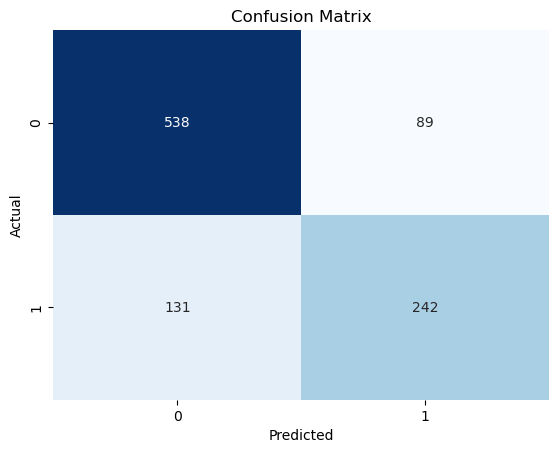

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [10]:
print(classification_report(experiment_df['target'], experiment_df['y_hat']))

              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83       627
         1.0       0.73      0.65      0.69       373

    accuracy                           0.78      1000
   macro avg       0.77      0.75      0.76      1000
weighted avg       0.78      0.78      0.78      1000



/Users/brianllinas/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/brianllinas/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/brianllinas/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/brianllinas/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

/Users/brianllinas/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/brianllinas/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/brianllinas/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/brianllinas/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

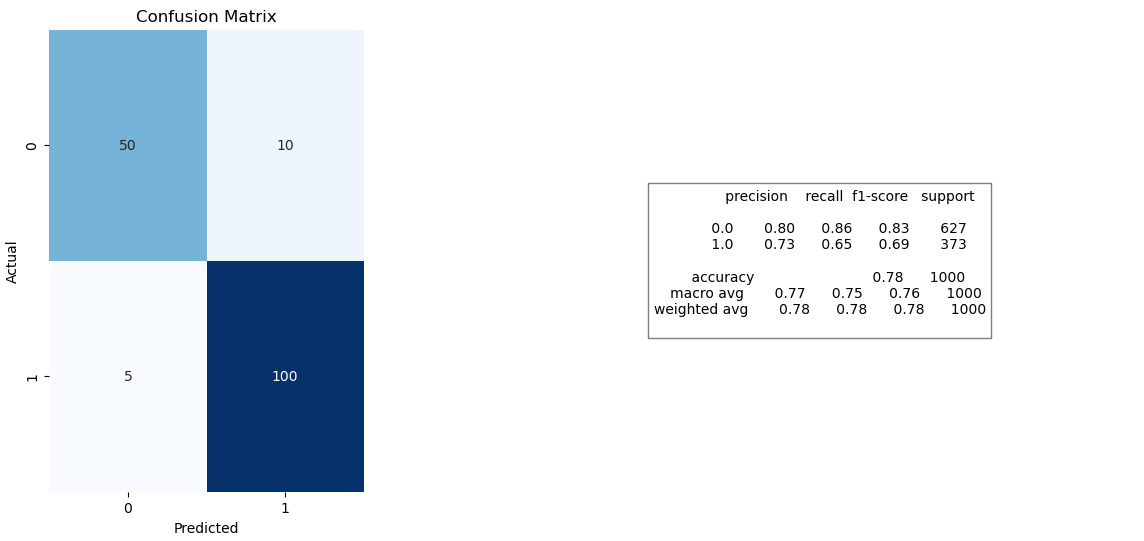

In [17]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


# Assuming you have computed the confusion matrix and classification report
# Replace this with your actual values
classification_rep = classification_report(experiment_df['target'], experiment_df['y_hat'])

# Set up the figure with a grid layout and some space between subplots
fig, ax = plt.subplots(figsize=(14, 6), nrows=1, ncols=2, gridspec_kw={'width_ratios': [1, 2], 'wspace': 0.3})

# Plotting the confusion matrix
with sns.axes_style("whitegrid"):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax[0])
    ax[0].set_xlabel('Predicted')
    ax[0].set_ylabel('Actual')
    ax[0].set_title('Confusion Matrix')

# Add classification report information to the plot
ax[1].text(0.5, 0.5, classification_rep, horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes, bbox=dict(facecolor='white', alpha=0.5))
ax[1].axis('off')  # Turn off axis for the classification report plot

# Display the plot
plt.show()


/Users/brianllinas/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/brianllinas/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/brianllinas/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/brianllinas/miniforge3/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

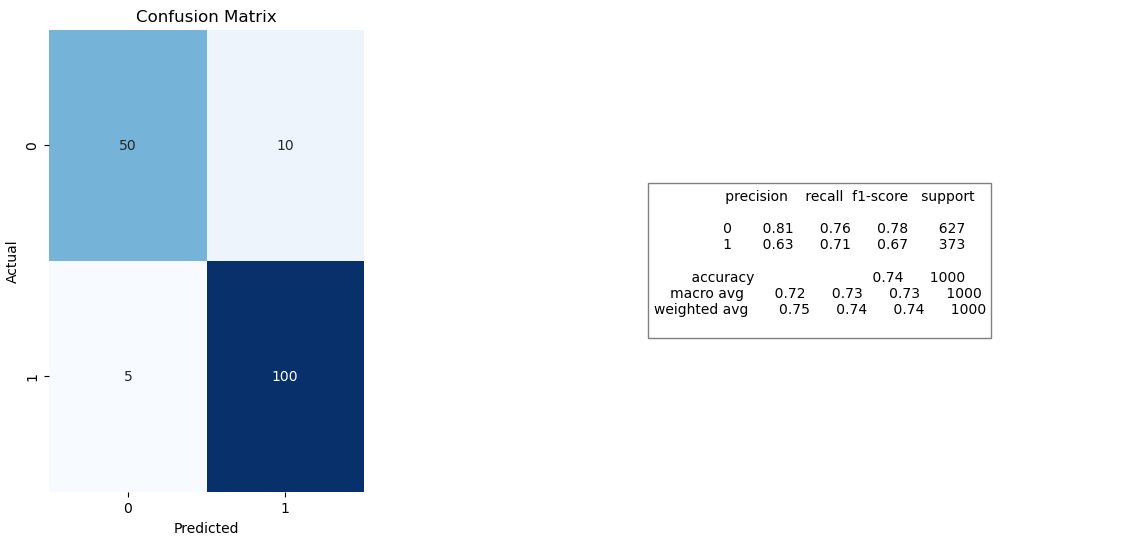

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_csv('../dataset/bert_CAL_experiment_results_v3.csv')

# Assuming you have computed the confusion matrix and classification report
# Replace this with your actual values
classification_rep = classification_report(df['true_label'], df['predicted_label'])

# Set up the figure with a grid layout and some space between subplots
fig, ax = plt.subplots(figsize=(14, 6), nrows=1, ncols=2, gridspec_kw={'width_ratios': [1, 2], 'wspace': 0.3})

# Plotting the confusion matrix
with sns.axes_style("whitegrid"):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax[0])
    ax[0].set_xlabel('Predicted')
    ax[0].set_ylabel('Actual')
    ax[0].set_title('Confusion Matrix')

# Add classification report information to the plot
ax[1].text(0.5, 0.5, classification_rep, horizontalalignment='center', verticalalignment='center', transform=ax[1].transAxes, bbox=dict(facecolor='white', alpha=0.5))
ax[1].axis('off')  # Turn off axis for the classification report plot

# Display the plot
plt.show()